In [1]:
# imports
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


%matplotlib inline

In [5]:
# read in the data
with open('../../datasets/recipes/train.json') as f:
    train_data = json.load(f)
train_data[0:2]

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
   'black olives',
   'grape tomatoes',
   'garlic',
   'pepper',
   'purple onion',
   'seasoning',
   'garbanzo beans',
   'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
   'ground pepper',
   'salt',
   'tomatoes',
   'ground black pepper',
   'thyme',
   'eggs',
   'green tomatoes',
   'yellow corn meal',
   'milk',
   'vegetable oil']}]

In [6]:
with open('../../datasets/recipes/test.json') as f:
    test_data = json.load(f)
test_data[0:2]

[{'id': 18009,
  'ingredients': ['baking powder',
   'eggs',
   'all-purpose flour',
   'raisins',
   'milk',
   'white sugar']},
 {'id': 28583,
  'ingredients': ['sugar',
   'egg yolks',
   'corn starch',
   'cream of tartar',
   'bananas',
   'vanilla wafers',
   'milk',
   'vanilla extract',
   'toasted pecans',
   'egg whites',
   'light rum']}]

Okay so taking a quick look at our data, we have the following format:
* Recipe Entry
    * Train only: Cuisine (prediction value)
    * ID
    * Ingredients
        * Ingredient 1
        * ...
        * Ingredient n
        
We're going to need to put these into a way that we can consume for machine learning. A few things to note:
* The ingredients seem to be kind of specific instead of generic. We may need to do some feature engineering here to make broader classes of ingredients (rum vs light rum, almonds vs toasted almond, etc...).
* There are different number of ingredients in each recipe. We will likely need to take a sparse-matrix feature matrix in order to play around with this.

In [25]:
# ids will not be important for the training, we don't have to worry about extracting these
train_labels = np.array([train_data[x]['cuisine'] for x in range(len(train_data))])
unique_ar = np.unique(train_labels, return_counts=True)
unique_ar

(array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
        'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
        'japanese', 'korean', 'mexican', 'moroccan', 'russian',
        'southern_us', 'spanish', 'thai', 'vietnamese'], dtype='<U12'),
 array([ 467,  804, 1546, 2673,  755, 2646, 1175, 3003,  667, 7838,  526,
        1423,  830, 6438,  821,  489, 4320,  989, 1539,  825], dtype=int64))

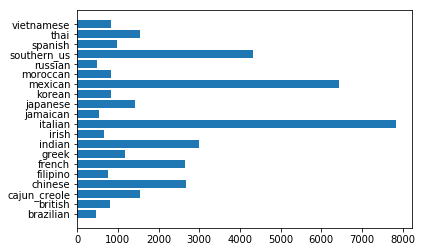

In [29]:
# quick plot of how many of each cuisine are in this dataset
x = np.arange(unique_ar[0].shape[0])
plt.barh(x,unique_ar[1])
plt.yticks(x, unique_ar[0])
plt.show()

OK so we have a lot of italian and mexican and southern recipes. We should make sure our validation set has a good amount of each class so we can see better where we're struggling. Before we get to that though, we ought to turn our features into something useable.

In [36]:
# extract all features from training
train_features = np.array([train_data[x]['ingredients'][i] for x in range(len(train_data)) \
                           for i in range(len(train_data[x]['ingredients']))])
unique_features = np.unique(train_features, return_counts=True)
unique_features[0].shape

(6714,)

OK there's no way I'm looking at all 6714 different ingredients, but we should take a look at a few to see if we can better understand them

In [40]:
np.random.seed(50)
return_items = np.random.randint(0, unique_features[0].shape[0], 50)
unique_features[0][return_items]

array(['squash blossoms', 'sliced kalamata olives', 'cooked vermicelli',
       'umeboshi vinegar', 'cranberry juice cocktail', 'English muffins',
       'turkey', 'vegetable juice', 'Bragg Liquid Aminos', 'horseradish',
       'turkey thigh', 'cubed bread', 'Old El Paso Flour Tortillas',
       'cheese tortellini', 'granita', 'hard cider', 'angel food cake',
       'dates', 'nutmeg', 'jerk paste', 'low-fat cheddar', 'fructose',
       'soda bread', 'white cheddar cheese', 'drippings',
       'refrigerated buttermilk biscuits', 'Zatarains Creole Seasoning',
       'pickled jalapenos', 'half & half',
       'less sodium fat free chicken broth', 'mole sauce',
       'pea eggplants', 'chambord', 'small new potatoes', 'tortillas',
       'Old El Pasoâ„¢ chopped green chiles', 'grana padano',
       'blood orange juice', 'quick-cooking barley', 'mustard oil',
       'clover honey', 'togarashi', 'soy milk', 'tenderloin roast',
       'mian', 'sandwich rolls', 'sour salt', 'bone-in ribeye ste

Turning these into something remotely generalizable looks to be like a difficult problem. Going to do a bit of internet research here...

__Ideas__:

https://www.kaggle.com/ccorbi/word2vec-with-ingredients

https://www.kaggle.com/c/whats-cooking/discussion/23727

https://www.kaggle.com/khyh00/deep-cooking

